In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
%cd '/content/drive/My Drive/University/ProjetML/'
%ls

/content/drive/.shortcut-targets-by-id/1clDDLY0UADr5OF8gCO2UkoIIMu755s4h/ProjetML
1_write_2d_images.ipynb  Data/  Projet/


In [ ]:
import pickle
import numpy as np
import pandas as pd
import tifffile
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import rescale_intensity
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import f1_score, confusion_matrix
import joblib
from matplotlib.colors import ListedColormap, BoundaryNorm
import random
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import seaborn as sns; sns.set_theme()

In [ ]:
with open('Data/Donnees_ENT/Final_Data_sets60.pickle', "rb") as f:
  train60_X, train60_y, valid60_X, valid60_y=pickle.load(f)
f.close() 

In [ ]:
with open('Data/Donnees_ENT/Final_Data_sets70.pickle', "rb") as f:
  train70_X, train70_y, valid70_X, valid70_y=pickle.load(f)
f.close() 

In [11]:
with open('Data/Donnees_ENT/Final_Data_sets60.pickle', "rb") as f:
  train80_X, train80_y, valid80_X, valid80_y=pickle.load(f)
f.close() 

##Random Forest

In [ ]:
# Classifieur Random Forest
clfRF = RandomForestClassifier(n_estimators=5)
clfRF.fit(train60_X,train60_y)
RF60_predicted = clfRF.predict(valid60_X)
RFS60 = clfRF.score(valid60_X,valid60_y)

In [ ]:
# Classifieur Random Forest
clfRF.fit(train70_X,train70_y)
RF70_predicted = clfRF.predict(valid70_X)
RFS70 = clfRF.score(valid70_X,valid70_y)

In [ ]:
# Classifieur Random Forest
clfRF.fit(train80_X,train80_y)
RF80_predicted = clfRF.predict(valid80_X)
RFS80 = clfRF.score(valid80_X,valid80_y)

In [ ]:
RFCr60=classification_report(valid60_y, RF60_predicted)
RFCr70=classification_report(valid70_y, RF70_predicted)
RFCr80=classification_report(valid80_y, RF80_predicted)

In [ ]:
dataRFS = [RFS60, RFS70, RFS80]
with open("Data/Donnees_ENT/RForestS.pickle", "wb") as fs:
  pickle.dump(dataRFS, fs)

fs.close()

dataRFCr = [RFS60, RFS70, RFS80]
with open("Data/Donnees_ENT/RForestCr.pickle", "wb") as fc:
  pickle.dump(dataRFCr, fc)

fc.close()

In [ ]:
print('Classification Report of RFC:\n')
print("\nAccuracy of RFC 60: ",RFS60)
print(RFCr60)
print("\n\nAccuracy of RFC 70: ",RFS70)
print(RFCr70)
print("\n\nAccuracy of RFC 80: ",RFS80)
print(RFCr80)

Classification Report of RFC:


Accuracy of RFC 60:  0.8406767938742744
              precision    recall  f1-score   support

           1       0.26      0.25      0.26       244
           2       0.99      0.96      0.97     22895
           3       0.78      0.94      0.86     80663
           4       0.55      0.32      0.40     26467
           5       0.94      0.88      0.91     72156

    accuracy                           0.84    202425
   macro avg       0.70      0.67      0.68    202425
weighted avg       0.83      0.84      0.83    202425



Accuracy of RFC 70:  0.8429585127941148
              precision    recall  f1-score   support

           1       0.18      0.12      0.15       205
           2       0.99      0.98      0.98     21464
           3       0.77      0.94      0.85     55974
           4       0.56      0.32      0.41     20980
           5       0.95      0.89      0.92     54846

    accuracy                           0.84    153469
   macro avg     

In [ ]:
rf_cf60 = confusion_matrix(valid60_y, RF60_predicted)
rf_cf70 = confusion_matrix(valid70_y, RF70_predicted)
rf_cf80 = confusion_matrix(valid80_y, RF80_predicted)

In [ ]:
dataRFCx = [rf_cf60, rf_cf70, rf_cf80]
with open("Data/Donnees_ENT/RForestC_matrix.pickle", "wb") as f:
  pickle.dump(dataRFCx, f)

f.close()

In [16]:
labels=['Zones urbaines', 'Eau', 'Forêt', 'Landes', 'Cultures']

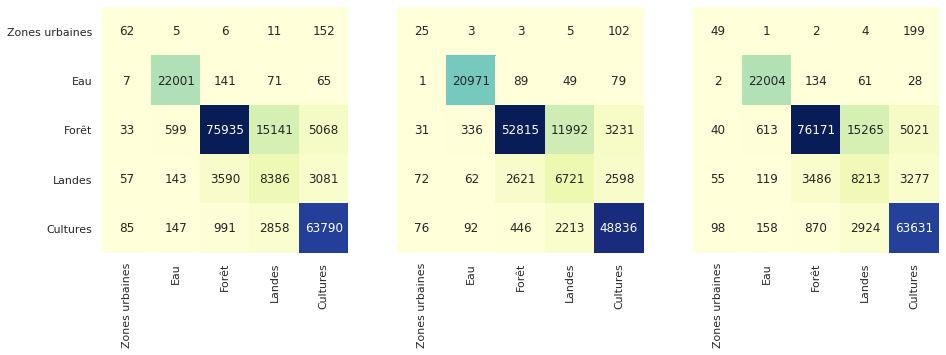

In [ ]:
#Confusion Matrix
fig=plt.figure(figsize = (15,15))
ax1 = plt.subplot(1, 3, 1) # row, column, position
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)


sns.heatmap(rf_cf60.T, ax=ax1, xticklabels=labels,yticklabels=labels, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)
sns.heatmap(rf_cf70.T, ax=ax2, xticklabels=labels,yticklabels=False,square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)
sns.heatmap(rf_cf80.T, ax=ax3, xticklabels=labels,yticklabels=False,square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)


##K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#We are going to run it for k = 1 to 20 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,20)
scores = {}
scores_list = []
for k in range_k:
   clfKN = KNeighborsClassifier(n_neighbors=k)
   clfKN.fit(train60_X, train60_y)
   y_pred = clfKN.predict(valid60_X)
   scores[k] = metrics.accuracy_score(valid60_y,y_pred)
   scores_list.append(metrics.accuracy_score(valid60_y,y_pred))

Text(0, 0.5, 'Accuracy')

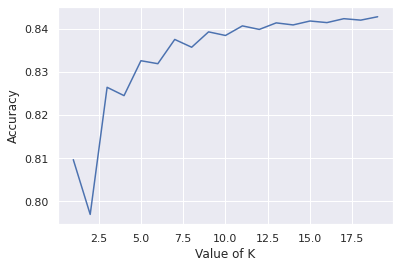

In [ ]:
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")



Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.09      0.15       244
           2       1.00      0.96      0.98     22895
           3       0.80      0.92      0.85     80663
           4       0.49      0.29      0.37     26467
           5       0.93      0.92      0.93     72156

    accuracy                           0.84    202425
   macro avg       0.72      0.64      0.66    202425
weighted avg       0.83      0.84      0.83    202425



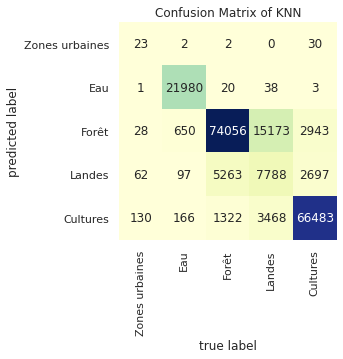

In [ ]:
clfKN = KNeighborsClassifier(n_neighbors=16)
clfKN.fit(train80_X, train80_y)
y_pred = clfKN.predict(valid80_X)
KNN_scores= metrics.accuracy_score(valid80_y,y_pred)
KNN_CM = metrics.confusion_matrix(valid80_y, y_pred)

KNN_CR = metrics.classification_report(valid80_y, y_pred)
print("\n\nClassification Report:",)
print (KNN_CR)


sns.heatmap(KNN_CM.T, xticklabels=labels,yticklabels=labels, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of KNN');


In [ ]:
dataKNN= [KNN_scores, KNN_CM, KNN_CR]
with open("Data/Donnees_ENT/KNN_data.pickle", "wb") as f:
  pickle.dump(dataKNN, f)

f.close()

##Support Vector Machines

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(train80_X, train80_y)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train80_X, train80_y)

In [9]:
rbf_pred = rbf.predict(valid80_X)
poly_pred = poly.predict(valid80_X)


In [13]:
rbf_scores = metrics.accuracy_score(valid80_y, rbf_pred)
poly_scores = metrics.accuracy_score(valid80_y, poly_pred)
rbf_CR = metrics.classification_report(valid80_y, rbf_pred)
poly_CR = metrics.classification_report(valid80_y, poly_pred)
print("\n\nClassification Report:",)
print(rbf_CR)
print(poly_CR)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       244
           2       1.00      0.95      0.97     22895
           3       0.76      0.95      0.84     80663
           4       0.07      0.01      0.01     26467
           5       0.88      0.94      0.91     72156

    accuracy                           0.82    202425
   macro avg       0.54      0.57      0.55    202425
weighted avg       0.74      0.82      0.77    202425

              precision    recall  f1-score   support

           1       0.51      0.24      0.33       244
           2       0.96      0.97      0.97     22895
           3       0.80      0.97      0.88     80663
           4       0.76      0.22      0.34     26467
           5       0.94      0.96      0.95     72156

    accuracy                           0.87    202425
   macro avg       0.79      0.67      0.69    202425
weighted avg       0.86      0.87      0.84    20242

In [14]:

rbf_CM = metrics.confusion_matrix(valid80_y, rbf_pred)
poly_CM = metrics.confusion_matrix(valid80_y, poly_pred)



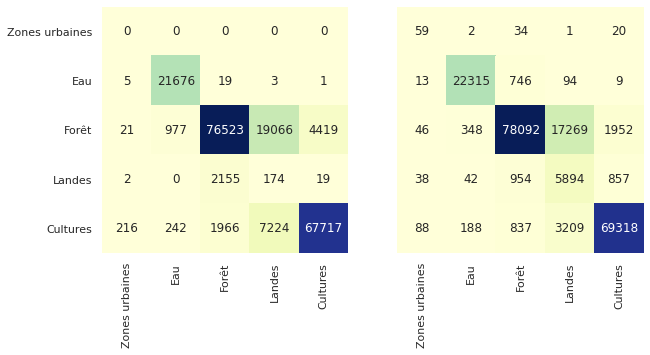

In [17]:
#Confusion Matrix
fig2=plt.figure(figsize = (15,15))
ax4 = plt.subplot(1, 3, 1) # row, column, position
ax5 = plt.subplot(1, 3, 2)

sns.heatmap(rbf_CM.T, ax=ax4, xticklabels=labels,yticklabels=labels, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)
sns.heatmap(poly_CM.T, ax=ax5, xticklabels=labels,yticklabels=False,square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu",)


In [18]:
dataSVM= [rbf_scores, poly_scores, rbf_CR, poly_CR, rbf_CM, poly_CM]
with open("Data/Donnees_ENT/SVM_data.pickle", "wb") as f:
  pickle.dump(dataSVM, f)

f.close()